# Завдання 1. Робота з набором файлів.
### 1) Сформувати в папці на диску набір із 15 зображень різних форматів, розмірів та колірних моделей. Додати туди 2-3 файли, що не є зображеннями.
### 2) Створити функцію, що в якості аргумента приймає адресу папки на диску та повертає датафрейм з наступною інформацією про зображення, що знаходяться в папці:
#### - ім’я файлу;
#### - кольорову модель;
#### - формат;
#### - кількість каналів у зображенні;
#### - розмір файлу у мегабайтах байтах, округлених до двох знаків після коми;
#### - ширину картинки;
#### - висоту картинки;
#### - повний шлях до файлу;
#### - зменшене зображення.

,File Name,Color Mode,File Format,Channels,File Size (MB),Width (px),Height (px),Thumbnail
0,0feba945cf5226bb785f12cea9992a32f8031d0bae44986e9355380c7f82ac63.webp,RGB,WEBP,3,0.04,1080,608,
1,800px-Sebastian_Vettel_won_2010_Japanese_GP.jpg,RGB,JPEG,3,0.11,800,496,
2,c.webp,RGB,WEBP,3,0.13,1600,900,
3,Comparative-Team-mate-Statistics-And-Their-Trends.jpg,RGB,JPEG,3,0.20,1800,945,
4,FIA_F1_Austria_2022_Podium_Race_(1).jpg,RGB,JPEG,3,0.10,800,450,
5,formula-1_862x485.webp,RGB,WEBP,3,0.05,862,485,
6,gettyimages-1496347042-612x612.jpg,RGB,JPEG,3,0.06,612,423,
7,gettyimages-52703570-612x612.jpg,RGB,JPEG,3,0.04,612,402,
8,gettyimages-52930308-612x612.jpg,RGB,JPEG,3,0.06,612,393,
9,gettyimages-52930415-612x612.jpg,RGB,JPEG,3,0.04,612,394,

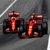
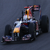
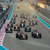
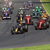
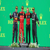
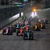
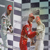
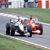
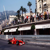
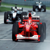
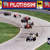
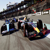
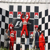
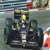
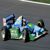

In [2]:
import os
from PIL import Image
import pandas as pd
from IPython.display import display, HTML
import base64
from io import BytesIO

def extract_image_data(directory_path):
    images_list = []
    for file in os.listdir(directory_path):
        file_path = os.path.join(directory_path, file)
        try:
            with Image.open(file_path) as img:
                image_data = {
                    "File Name": file,
                    "Color Mode": img.mode,
                    "File Format": img.format,
                    "Channels": len(img.getbands()),
                    "File Size (MB)": round(os.path.getsize(file_path) / (1024 * 1024), 2),
                    "Width (px)": img.width,
                    "Height (px)": img.height,
                    "Thumbnail": f'<img src="data:image/png;base64,{image_to_base64(generate_thumbnail(img))}">'
                }
                images_list.append(image_data)
        except Exception:
            continue

    image_dataframe = pd.DataFrame(images_list)
    pd.set_option('display.max_colwidth', None)
    display(HTML(image_dataframe.to_html(escape=False)))
    return image_dataframe

def generate_thumbnail(image, new_size=(50, 50)):
    return image.resize(new_size)

def image_to_base64(image):
    img_buffer = BytesIO()
    image.save(img_buffer, format="PNG")
    return base64.b64encode(img_buffer.getvalue()).decode('utf-8')

folder_path = "photos/f1/"
image_info = extract_image_data(folder_path)

## Завдання 2.
### Створити функцію, що в якості аргумента приймає:
#### - шлях до папки;
#### - назва вихідного зображення;
#### - кількість зображень в рядку;
#### - кількість зображень в стовпчику
### і повертає зображення постера.

1) Створити функцію, що перетворює картинку на квадрат з максимально можливим розміром сторони (наприклад, якщо картинка розміром 800x533,
то вихідний розмір повинен бути 533x533). Обрізаємо картинку з двох країв, тобто розмір розраховуємо від центру.
2) Всі картинки, з яких створено постер, повинні бути однакового розміру, Тобто після обрізки необхідно змінити розмір, наприклад, на 500x500.
3) Картинки для додавання в постер обирати випадковим чином. Картинки можуть повторюватись.
4) На картинку «накласти фільтр» червоного, зеленого, синього, жовтого, пурпурного або голубого кольорів, що також обираються випадковим чином та можуть повторюватись.
5) Надати 3-4 варіанти постерів, що збережено у файлах на диску.
6) Використовувати зображення, що знаходяться в папці, що сформована в завданні 1
7) Для обробки зображень використовувати бібліотеки Pillow та/або OpenCV.


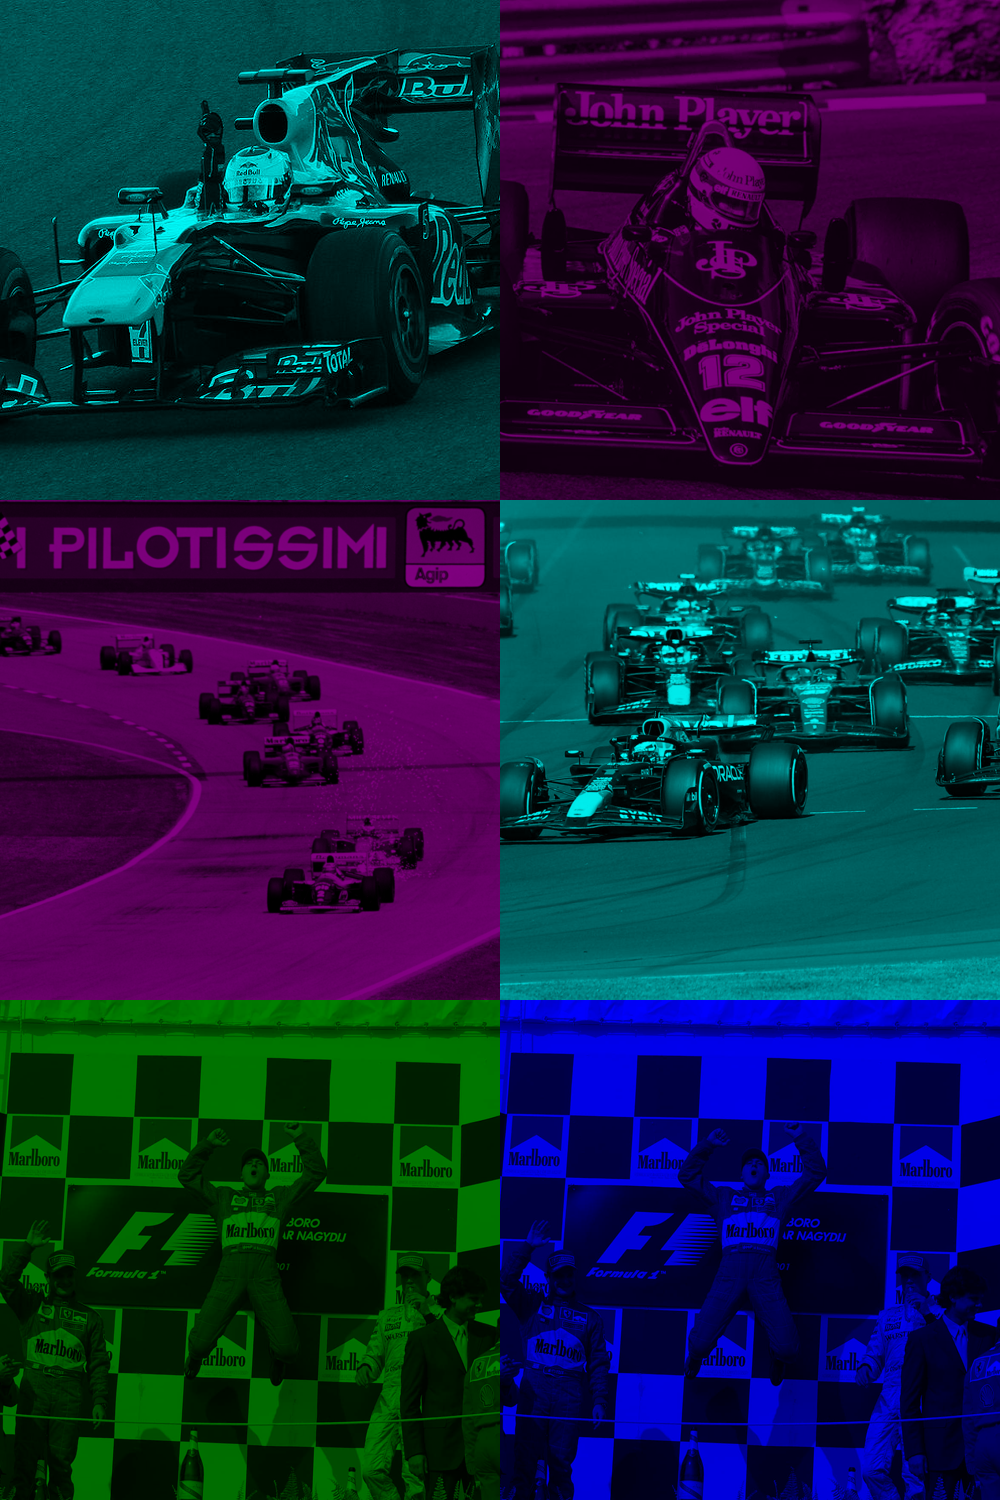

In [5]:
import random
from PIL import ImageEnhance, ImageOps
from IPython.display import display

def create_collage(directory_path, rows, cols):
    available_images = [os.path.join(directory_path, file) for file in os.listdir(directory_path) if file.lower().endswith(('png', 'jpg', 'jpeg'))]

    def modify_image(image_path, target_size=500):
        with Image.open(image_path) as img:
            shortest_side = min(img.size)
            left = (img.width - shortest_side) // 2
            top = (img.height - shortest_side) // 2
            img = img.crop((left, top, left + shortest_side, top + shortest_side))
            img = img.resize((target_size, target_size))

            color_filter = random.choice(["red", "green", "blue", "yellow", "purple", "cyan"])
            enhancer = ImageEnhance.Color(img)
            img = enhancer.enhance(0.5)
            img = ImageOps.colorize(img.convert("L"), black="black", white=color_filter)
            return img

    collage_width = cols * 500
    collage_height = rows * 500
    collage_image = Image.new("RGB", (collage_width, collage_height))

    for i in range(rows):
        for j in range(cols):
            img_file = random.choice(available_images)
            modified_image = modify_image(img_file)
            collage_image.paste(modified_image, (j * 500, i * 500))

    display(collage_image)

create_collage(folder_path, 3, 2)